# Regresión logística    

Anteriormente vimos como hay una correspondencia entre el método de mínimos cuadrados y MLE, con el objetivo de maximizar la distribución de probabilidad que describe los datos. 

Y a traves de esto ajustamos la mejor recta a un conjunto de puntos que describe un comportamiento lineal. Algo similar sucederá con el siguiente tema.

Ahora lo haremos con la regresión logística, que no resuelve un problema de regresión sino uno de clasificación. Empezaremos con un problema de clasificación binario.

### ¿Qué significa la regresión logística en este tipo de problemas de Machine Learning?

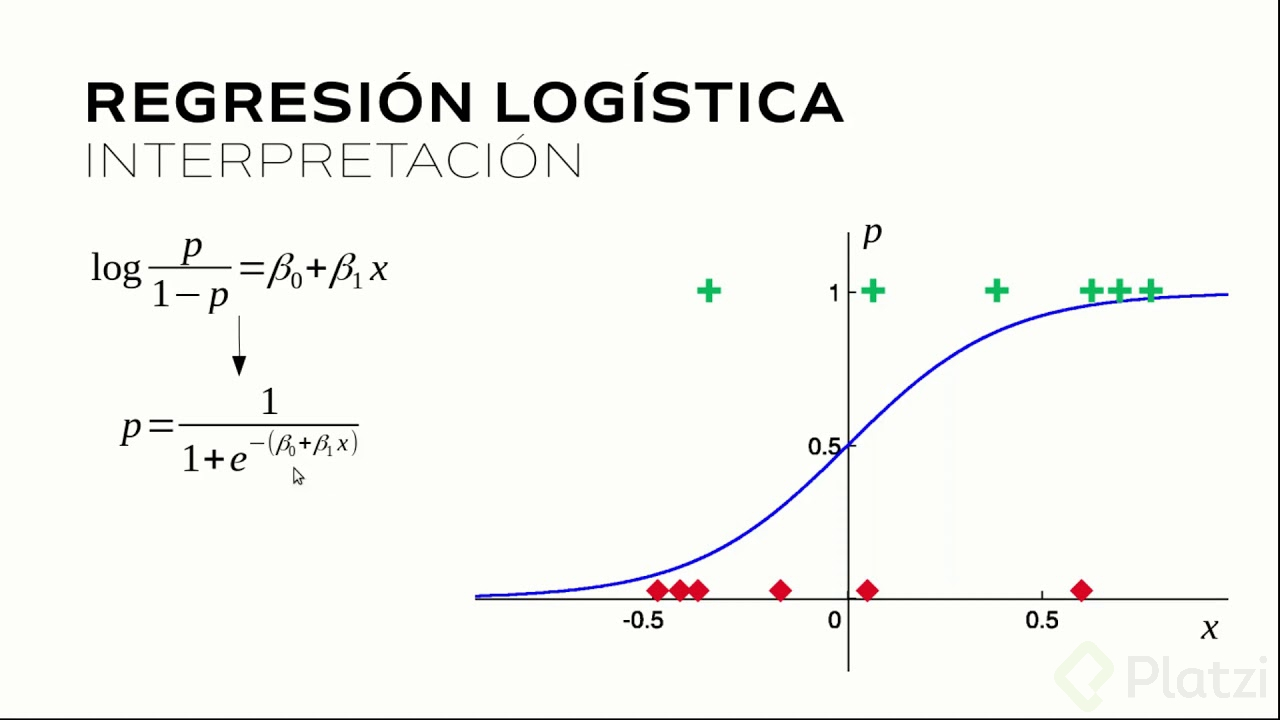

Vemos la analogía de la regresión lineal (a un conjunto de datos que describen una tendencia lineal) y lo que sería un problema de clasificación, donde los resultados tienen que ser 2 tipos cuando hablamos de clasificación binaria (0,1).

- Regresión lineal        
  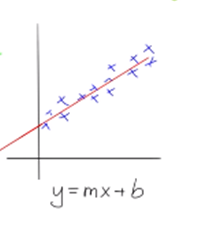

- Regresión logística       
 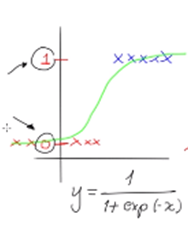

La función que sirve para clasificación la conocemos como **sigmoidal**. La idea principal de la función es que los datos estén cerca del valor $0$ o $1$. Y si yo ajusta la mejor sigmoide posible a es tipo de clasificación, entonces lo llamamos una regresión logística.
$$y=\frac 1 {1+\exp (-x)}$$

## Explicación de regresión logística para clasificación   
Entendamos que el problema esta basado en problema de clasificación con atributos. **¿Qué quiere decir?** Hay varias variables que llamaríamos **independientes o predictores**, que dependiendo de los valores que tengan, puedo predecir la clase.

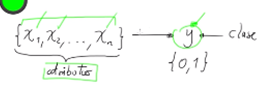

Imaginemos que estamos prediciendo si una transacción bancaria fue fraudulenta o no.
- Fraude
- No fraude

Y las variables representarían
$$
\underbrace{ \{  X_1,X_2,..,X_n  \} } _{\text{atributos}}\\ 
\begin{array}{cl} \\
 X_1:&\text{Hora de la transacción}\\
 X_2:&\text{Monto de la transacción} \\
 \vdots& \\
 X_n:& \text{Cualquier parámetro}
\end{array}
$$

La idea es que en un problema de tipo clasificación, considero los atributos o variables y los combino por medio de pesos o parámetros, que se encargaran de determinar que variables son mas relevantes o no. Y entonces los $\beta 's$ me generan una combinación lineal completa de todas mis variables y me daría una nueva variable $X$. Y la $X$ la metemos a la exponencial.

$$\underbrace{\quad\beta _1x_1+\beta _2x_2+\ldots+\beta _nx_n \quad}_{\text{Combinación lineal}} = X$$
Entonces $X$ queda adentro de $\exp(-x)$ en:
$$y=\frac 1 {1+ \exp(-x)}$$

De manera que a lo largo del eje $x$ de la regresión logística están codificadas todas las variables.

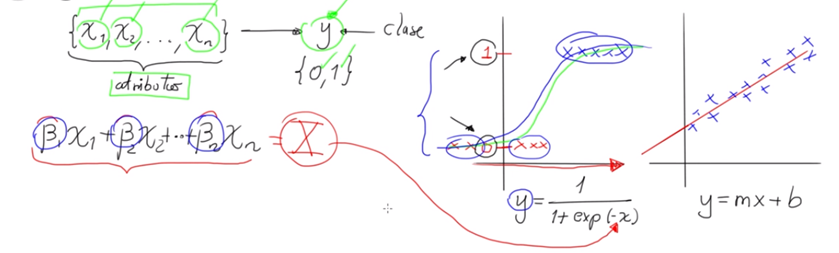

### ¿Cómo funciona la regresión logística?
Lo que yo hago es modificar los pesos o parámetros $\beta \text{'s}$ de todas las mis variables o atributos, de manera que los puntos se van a redistribuir lo suficientemente bien como para que la clasificación a lo largo de la curva logística se a lo mejor posible. Ya que en general el resultado que obtenga de $y$ en $y=\frac 1 {1+ \exp(-x)}$ estará entre 0 y 1, pero pueden haber valores intermedios.

Entonces si yo tengo un conjunto de valores, y tienen asignados una clasificación del tipo **binaria(0,1)**, pero cuando uso la función $y(x)$ y el resultado es $P\approx 0.9$, este tipo de resultados me genera un error de $ error \approx 0.1 $.     
Entonces la idea es **escoger las betas** $\beta 's$ para que las $P's$ que serán probabilidades estén entre 0 y 1 y me den los errores más pequeños posibles $error<<<$ o mejor me den $P>>>$, es decir **probabilidades altas** en términos de las categorías que yo necesito.

Ahora lo importante es entender como entra el concepto de MLE (Estimación de Maxima Verosimilitud) en este problema. Resulta que podemos formular el problema como lo hicimos con la regresión lineal.
$$\max \: \left\{ \quad \sum_i \log P (Y_i,X_i;h) \quad \right\}
\\
\begin{array}{rl} \\\\
Y_i:& \text{Datos reales de mi data set} \\\\
\hat y:& \text{Datos de la función } \hat y=p=\frac 1 {1+\exp (-X)}\\\\
X:& \text{Atributos en el dataset } \underbrace{ \{  X_1,X_2,..,X_n  \} } _{\text{atributos}}
\end{array}
$$
Los valores reales (es decir de mi data set) son $y_i$ pero los que va a arrojar mi modelo son $\hat y$ por la función logística que estoy usando (toda la expresión de calculo) y aquí es donde está la combinación lineal de todos mis atributos (en -x).

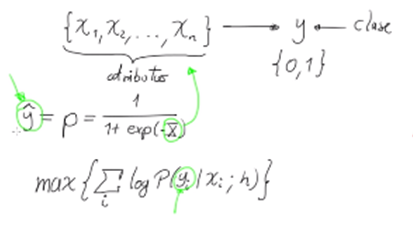

Así que yo debo tener claro cual **tipo de probabilidad o verosimilitud se máxima** cuando lleguen a coincidir $\hat y$ e $Y_i$.

Esto se hace calculando el valor promedio de la distribución que sigue cada uno de estos intentos y la distribución es $\Large\text{Bernoulli}$. En breve nos da: 

\begin{equation*} \small
P \; \left \{ 
    \begin{array} {lcl}
        P & y=1  & \text{cuando el resultado es exitoso.} \\ 
        1-P & y=0&  \text{cuando el resultado no es exitoso.}
    \end{array}
    \right.
\end{equation*}

Entonces tenemos que la probabilidad $P$ es algo parecido a:
$$\overline P = P\times 1 + (1-P)\times 0$$
Y aplicando concepto de similitud tenemos:
$$L =\underbrace {\quad \hat y \times y+(1-\hat y)\times (1-y) \quad}_{\text{Verosimilitud - Likelihood}}$$
Pero esta $L$ es solo la verosimilitud de un punto $(x_i,y_i)$

Entonces para obtener la verosimilitud total $L_i$ tenemos que contemplar que:
1. Probabilidades se cambian por logaritmos $\quad p\rightarrow \log p$     
 Esto hará que la función se comporte mejor para evitar el **underflow**

2. Sumar todos los valores de verosimilitud del dataset $\quad \sum L_i = L$

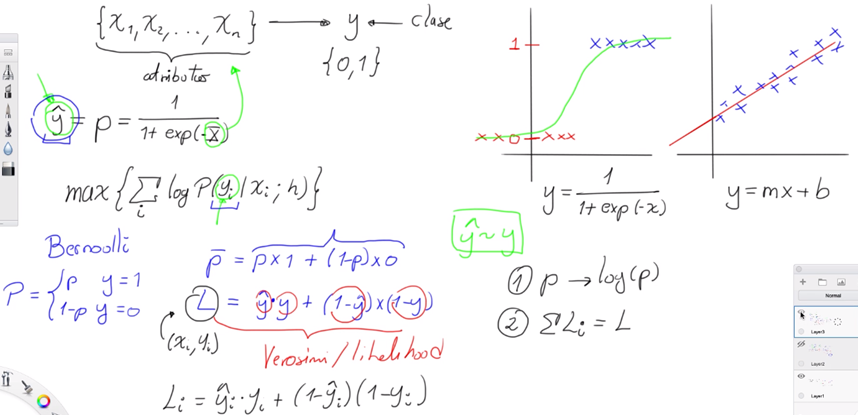

Siempre hay que tener presente que 
> $\small\hat y = \text{Resultado de función sigmoidal}$

Realizaremos los pasos anteriores para que la expresión quede  como:
\begin{equation*} \large
    \begin{aligned} \\
        L_i & = y_i \log \hat {y_i}+(1-y_i)\log(1-\hat{y_i}) \\ \\
        L & = \sum_i {\left[\: y_i \log \hat {y_i}+(1-y_i)\log(1-\hat{y_i})\: \right] }
    \end{aligned} 
\end{equation*}

Ahora lo que tenemos que realizar es **Maximizar está verosimilitud**. De manera que cumpla:
$$\max L = \min (-L)$$
En otras palabras; maximizar quiere decir minimizar **el negativo de Verosimilitud**. De manera al proceso de minimizar $-L$ es optimizar esa función en un problema de clasificación y se conoce como **Cross Entropy - Entropía Cruzada**. Y se define como:
$$CE = \underbrace{\quad-\sum_i {\left[\: y_i \log \hat {y_i}+(1-y_i)\log(1-\hat{y_i})\: \right]}\quad}_{\text{Costo }\rightarrow \text{ Clasificación}} $$

> Esta formula que vemos arriba es lo que llaman la función **de costo o de error** siempre que **hay un problema de clasificación**, y ahora entendemos porque es así. En los problemas de clasificación acostumbramos usarla, pero solo en clasificación binaria (0,1). Ya que esta función de verosimilitud da los **valores mas altos de probabilidad** justo cuando la predicción de la **función sigmoid coincide con las clases de mi dataset** $\Large\hat y \approx  y$.

Así que ya sabemos de donde sale la **Cross Entropy** que es la función de error que busca siempre minimizarse en un problema de clasificación binario. Resulta que Cross Entropy es una consecuencia de la **Estimación de Maxima Verosimilitud** cuando buscamos encontrar una función de probabilidad que nos de los valores máximos cuando las predicciones del modelo por medio de la **Sigmoide** se acercan a las **clases del dataset**, y esto es muy importante, porque es necesario que entendamos de donde sale la función de error y porque se usa esta función de error en un problema binario.

## Extra:
Aporte de JAVIER SANTIAGO SALGADO      
Alguna bibliografía de este tema:

- T. M. Cover, J. A. Thomas, “Elements of Information Theory, Second Edition” (2006)
- I. Goodfellow, Y. Bengio, A. Courville, “Deep Learning” (2015)
- S. Shalev-Shwartz, S. Ben-David, “Understanding Machine Learning, From Theory to Algorithms” (2014)

---------------------------

## Enlaces:
- [Regresión logística simple y multiple](https://cienciadedatos.net/documentos/27_regresion_logistica_simple_y_multiple)
- [Introduction to Logistic Regression](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20Regression%20is%20a%20Machine,on%20the%20concept%20of%20probability.&text=The%20hypothesis%20of%20logistic%20regression,function%20between%200%20and%201%20.)